In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import pickle
from sklearn.preprocessing import StandardScaler

## 1) Importing Data 

In [2]:
sp500=yf.download('^GSPC',start="2011-01-01", end="2015-12-31",interval='1d')

[*********************100%***********************]  1 of 1 completed


In [3]:
sp500.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-03,1257.619995,1276.170044,1257.619995,1271.869995,1271.869995,4286670000
2011-01-04,1272.949951,1274.119995,1262.660034,1270.199951,1270.199951,4796420000
2011-01-05,1268.780029,1277.630005,1265.359985,1276.560059,1276.560059,4764920000
2011-01-06,1276.290039,1278.170044,1270.430054,1273.849976,1273.849976,4844100000
2011-01-07,1274.410034,1276.829956,1261.699951,1271.500000,1271.500000,4963110000


In [4]:
sp500['Returns %']=sp500['Adj Close'].diff() / sp500['Adj Close']

In [5]:
sp500.head()

,Open,High,Low,Close,Adj Close,Volume,Returns %
Date,,,,,,,
2011-01-03,1257.619995,1276.170044,1257.619995,1271.869995,1271.869995,4286670000,NaN
2011-01-04,1272.949951,1274.119995,1262.660034,1270.199951,1270.199951,4796420000,-0.001315
2011-01-05,1268.780029,1277.630005,1265.359985,1276.560059,1276.560059,4764920000,0.004982
2011-01-06,1276.290039,1278.170044,1270.430054,1273.849976,1273.849976,4844100000,-0.002127
2011-01-07,1274.410034,1276.829956,1261.699951,1271.500000,1271.500000,4963110000,-0.001848


<AxesSubplot:xlabel='Date'>

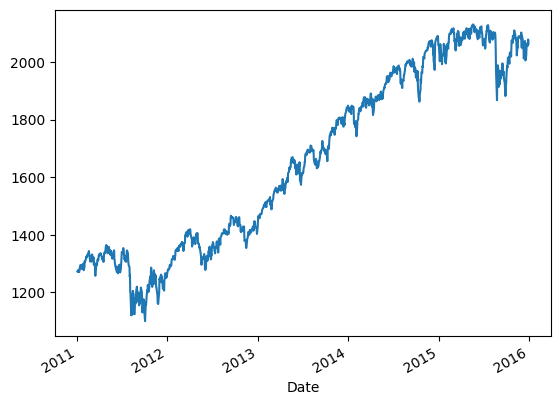

In [6]:
sp500['Adj Close'].plot()

<AxesSubplot:xlabel='Date'>

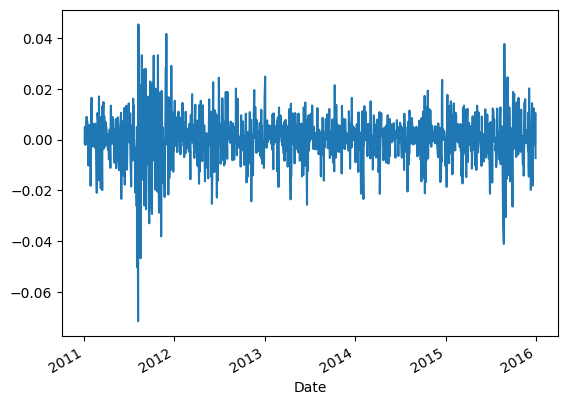

In [7]:
sp500['Returns %'].plot()

In [8]:
# sp500['Adj Close'].ewm(span=100).mean().plot()

In [9]:
# sp500['Adj Close']=sp500['Adj Close'].ewm(span=80).mean()

<AxesSubplot:xlabel='Date'>

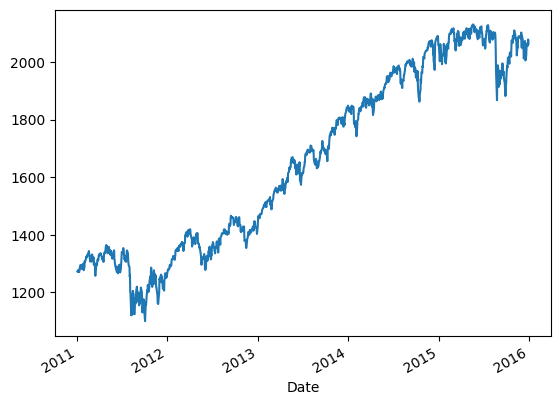

In [10]:
sp500['Adj Close'].plot()

The cyclical component represents phenomena that happen across seasonal periods. Cyclical patterns do not have a fixed period like seasonal patterns do. An example of a cyclical pattern is the cycles of boom and bust that stock markets experience in response to world events. <br>
This data seems to have cyclical component with no consistent cyclicity. So instead of decomposing it into trend, seasonality, noise, we would just keep it as it is.

In [11]:
sp500['Adj Close'].shape

(1257,)

Figure(640x480)


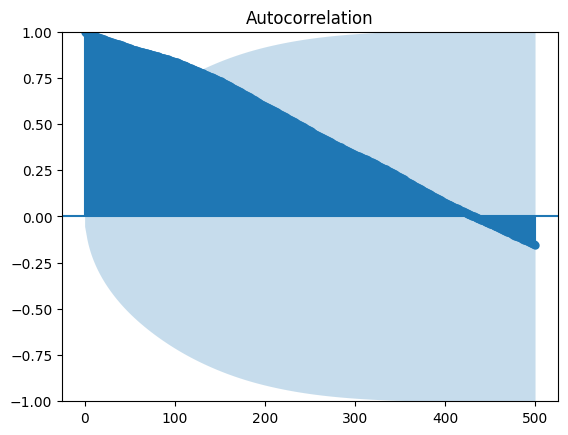

In [12]:
print(plot_acf(sp500['Adj Close'],lags=500))

Also autocorrelation graph shows no seasonal pattern.

## 4) Model

In [13]:
'''with open('nifty_08_12.pkl', 'wb') as f:
    pickle.dump(sar, f) '''

"with open('nifty_08_12.pkl', 'wb') as f:\n    pickle.dump(sar, f) "

In [14]:
'''with open('nifty_08_12.pkl', 'rb') as f:
    sar = pickle.load(f) '''

"with open('nifty_08_12.pkl', 'rb') as f:\n    sar = pickle.load(f) "

In [15]:
sp500_fore=yf.download('^GSPC',start="2016-01-01", end="2016-03-06",interval='1d')
sp500_fore['Adj Close']

[*********************100%***********************]  1 of 1 completed


Date
2016-01-04    2012.660034
2016-01-05    2016.709961
2016-01-06    1990.260010
2016-01-07    1943.089966
2016-01-08    1922.030029
2016-01-11    1923.670044
2016-01-12    1938.680054
2016-01-13    1890.280029
2016-01-14    1921.839966
2016-01-15    1880.329956
2016-01-19    1881.329956
2016-01-20    1859.329956
2016-01-21    1868.989990
2016-01-22    1906.900024
2016-01-25    1877.079956
2016-01-26    1903.630005
2016-01-27    1882.949951
2016-01-28    1893.359985
2016-01-29    1940.239990
2016-02-01    1939.380005
2016-02-02    1903.030029
2016-02-03    1912.530029
2016-02-04    1915.449951
2016-02-05    1880.050049
2016-02-08    1853.439941
2016-02-09    1852.209961
2016-02-10    1851.859985
2016-02-11    1829.079956
2016-02-12    1864.780029
2016-02-16    1895.579956
2016-02-17    1926.819946
2016-02-18    1917.829956
2016-02-19    1917.780029
2016-02-22    1945.500000
2016-02-23    1921.270020
2016-02-24    1929.800049
2016-02-25    1951.699951
2016-02-26    1948.050049
2016-02

In [16]:
sp500_fore['Returns %']=sp500_fore['Adj Close'].diff() / sp500_fore['Adj Close']

In [17]:
# np.log(sp500_fore.loc[~np.isnan(np.array(sp500_fore['Returns %'])),'Returns %']+1)

In [18]:
# np.log(sp500.loc[~np.isnan(np.array(sp500['Returns %'])),'Returns %']+1).append(sp500_fore['Adj Close'])

In [19]:
# non seasonal
def dynamic_pred(df,df1):
    len_df=len(df)
    pred_df=pd.Series()
    for y,x in df1.items():
        sar = sm.tsa.statespace.SARIMAX(df, 
                                order=(2,0,1), 
                                seasonal_order=(0,0,0,50), 
                                trend='c').fit()
        pred=sar.forecast(steps=1)
        
        x=pd.Series([x],index=[y])
        pred.index=x.index
        pred_df=pred_df.append(pred)
        if len(df)==len_df+len(df1):
            break
        else:
            df=df.append(x)
              
    return pred_df

In [20]:
sp500_for=dynamic_pred(np.log(sp500.loc[~np.isnan(np.array(sp500['Returns %'])),'Returns %']+1),np.log(sp500_fore.loc[~np.isnan(np.array(sp500_fore['Returns %'])),'Returns %']+1))

C:\Users\hp\AppData\Local\Temp\ipykernel_16216\3312173434.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pred_df=pd.Series()
C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary

C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\hp\AppData\Local\Temp\ipykernel_16216\3312173434.py:14: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred_df=pred_df.append(pred)
C:\Users\hp\AppData\Local\Temp\ipykernel_16216\3312173434.py:18: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(x)
C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\miniconda3\envs\kirtesh\lib\s

C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\hp\AppData\Local\Temp\ipykernel_16216\3312173434.py:14: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred_df=pred_df.append(pred)
C:\Users\hp\AppData\Local\Temp\ipykernel_16216\3312173434.py:18: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(x)
C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\miniconda3\envs\kirtesh\lib\s

C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\hp\AppData\Local\Temp\ipykernel_16216\3312173434.py:14: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred_df=pred_df.append(pred)
C:\Users\hp\AppData\Local\Temp\ipykernel_16216\3312173434.py:18: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(x)
C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\miniconda3\envs\kirtesh\lib\s

C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\hp\AppData\Local\Temp\ipykernel_16216\3312173434.py:14: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred_df=pred_df.append(pred)
C:\Users\hp\AppData\Local\Temp\ipykernel_16216\3312173434.py:18: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(x)
C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\miniconda3\envs\kirtesh\lib\s

C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\hp\AppData\Local\Temp\ipykernel_16216\3312173434.py:14: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred_df=pred_df.append(pred)
C:\Users\hp\AppData\Local\Temp\ipykernel_16216\3312173434.py:18: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(x)
C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\miniconda3\envs\kirtesh\lib\s

C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\hp\AppData\Local\Temp\ipykernel_16216\3312173434.py:14: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred_df=pred_df.append(pred)
C:\Users\hp\AppData\Local\Temp\ipykernel_16216\3312173434.py:18: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(x)
C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\miniconda3\envs\kirtesh\lib\s

C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\hp\AppData\Local\Temp\ipykernel_16216\3312173434.py:14: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred_df=pred_df.append(pred)
C:\Users\hp\AppData\Local\Temp\ipykernel_16216\3312173434.py:18: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(x)
C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\miniconda3\envs\kirtesh\lib\s

C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\hp\AppData\Local\Temp\ipykernel_16216\3312173434.py:14: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred_df=pred_df.append(pred)
C:\Users\hp\AppData\Local\Temp\ipykernel_16216\3312173434.py:18: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(x)
C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\miniconda3\envs\kirtesh\lib\s

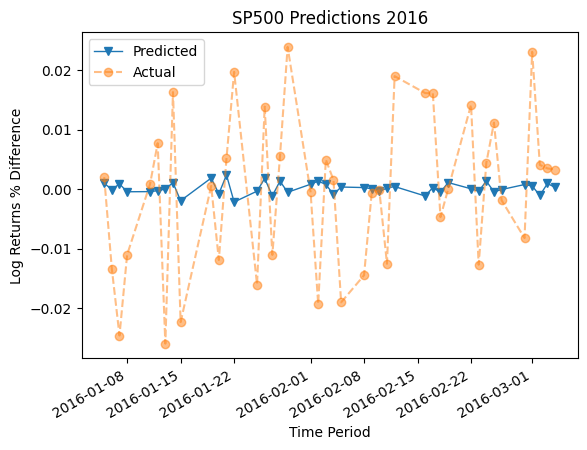

In [23]:
import matplotlib.pyplot as plt
sp500_for.plot(marker='v',linewidth=1)
np.log(sp500_fore.loc[~np.isnan(np.array(sp500_fore['Returns %'])),'Returns %']+1).plot(xlabel='Time Period',ylabel='Log Returns % Difference',linestyle='--',marker='o',alpha=0.5,legend='Actual')
plt.legend(['Predicted','Actual'])
plt.title('SP500 Predictions 2016')
plt.savefig('ppt_pics/SP500_predictions_2016.png')

<AxesSubplot:xlabel='Date'>

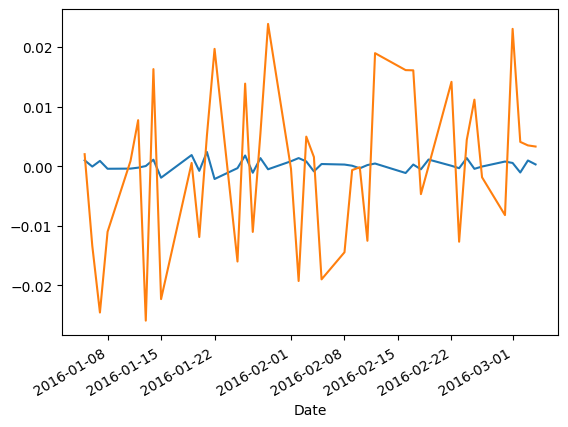

In [24]:
sp500_for.plot()
np.log(sp500_fore.loc[~np.isnan(np.array(sp500_fore['Returns %'])),'Returns %']+1).plot()

In [25]:
# np.sign(np.array(sp500_for))==np.sign(np.array(np.log(sp500_fore.loc[~np.isnan(np.array(sp500_fore['Returns %'])),'Returns %']+1)))

In [28]:
def accuracy_sarimax(df1,df2):
    x=np.sign(np.array(df1))==np.sign(np.array(df2))
    
    return sum(x) / len(x)

In [30]:
acc_sp500_ns_11_15=accuracy_sarimax(sp500_for,np.log(sp500_fore.loc[~np.isnan(np.array(sp500_fore['Returns %'])),'Returns %']+1))
acc_sp500_ns_11_15

0.5714285714285714

In [31]:
from sklearn.metrics import r2_score
r2_score(np.log(sp500_fore.loc[~np.isnan(np.array(sp500_fore['Returns %'])),'Returns %']+1), sp500_for)

0.0030788744652043842

In [25]:
%store acc_sp500_ns_11_15

Stored 'acc_sp500_ns_11_15' (float64)
